# Manipuler un tableau

Pandas a différentes méthodes pour manipuler un tableau :

- sur les colonnes
- sur le tableau en entier

En particulier la possibilité de sélectionner des sous éléments

# Enquête sur la science ouverte

Mariannig Le Béchec Aline Bouchard Philippe Charrier, Claire Denecker Gabriel Gallezot Stéphanie Rennes

Rapport : https://hal.archives-ouvertes.fr/hal-03545512v1

Réutilisation de données : https://zenodo.org/record/5827206


## Importer Pandas et les données

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/pyshs/Formation-URFIST-Lyon-2022-printemps/main/Data/SOSP_Export.csv")

In [5]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df[["annee_premiere_publi","Systeme_exploitation"]].to_excel("colonnes.xls")

/tmp/ipykernel_58615/1821743627.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df[["annee_premiere_publi","Systeme_exploitation"]].to_excel("colonnes.xls")


In [12]:
pip install xlwt

  Using cached xlwt-1.3.0-py2.py3-none-any.whl (99 kB)
Note: you may need to restart the kernel to use updated packages.


## Accéder à un élément avec des conditions

Accéder à un élément

In [15]:
df.loc[2,"contexte_travail"]

'nous sommes entre 2 et 5 personnes'

In [17]:
df["annee_premiere_publi"] <= 2000

0        True
1       False
2       False
3        True
4       False
        ...  
1084    False
1085     True
1086     True
1087     True
1088    False
Name: annee_premiere_publi, Length: 1089, dtype: bool

In [20]:
df[df["annee_premiere_publi"]<=2000]["Systeme_exploitation"]

0                              Windows
3       Windows;autres OS (Android...)
6                              Windows
7                  Windows;MacOS;Linux
10                             Windows
                     ...              
1067                           Windows
1073                           Windows
1085                             Linux
1086                           Windows
1087                             Linux
Name: Systeme_exploitation, Length: 429, dtype: object

In [29]:
filtre1 = (df["annee_premiere_publi"]<=2000) 
filtre2 = (df["Systeme_exploitation"]=="Linux")
filtre_total = filtre1 & filtre2

In [24]:
df[filtre].shape

(51, 131)

Autres méthodes disponibles

In [28]:
df[df["Systeme_exploitation"].str.contains("Linux|Unix")]

,Id,contexte_travail,fonction_recherche,statut_professionnel,statut_professionnel_Autre,annee_premiere_publi,Systeme_exploitation,Usage_telephone_mobile,Outils_gestion_travail_av_confinement_visioconférence,Outils_gestion_travail_av_confinement_planification_RDV,...,Souhait_partage_donnees_produites_discipline,Souhait_partage_donnees_produites_pays_continent,Souhait_partage_donnees_produites_domaine_economique,Souhait_partage_donnees_produites_secteur_associatif,Souhait_partage_donnees_produites_sans_restriction,compatibilite_diffusion_partage,evolutions_pratiques_numeriques,sexe,disciplines_9niv,annee_de_naissance-recod10niv
7,8,nous sommes entre 11 et 20 personnes,professeur / professeure des universités et as...,fonctionnaire ou assimilé,NaN,1991,Windows;MacOS;Linux,rarement,parfois,toujours,...,oui,oui,non,non,non,oui,NaN,une femme,Médecine,56 à 60 ans
12,13,nous sommes entre 2 et 5 personnes,ingénieur / ingénieure de recherche,en CDI,NaN,2010,Windows;Linux,jamais,rarement,parfois,...,oui,oui,oui,oui,oui,oui,"sans doute, en fonction des besoins de mes col...",un homme,Médecine,36 à 40 ans
22,23,nous sommes entre 2 et 5 personnes,doctorant / doctorante (y compris CIFRE),fonctionnaire ou assimilé,NaN,2020,Windows;Linux,jamais,rarement,souvent,...,oui,oui,oui,oui,oui,une fois la publication acceptée et publiée se...,mise à disposition des données sources\npublic...,un homme,Médecine,31 à 35 ans
25,26,nous sommes entre 2 et 5 personnes,maître / maîtresse de conférences et assimilés,fonctionnaire ou assimilé,NaN,2006,Linux,rarement,parfois,rarement,...,non,non,non,non,non,"Oui, elles font partie de la valorisation.",Non,une femme,Lettres et Arts,36 à 40 ans
27,28,nous sommes entre 2 et 5 personnes,maître / maîtresse de conférences et assimilés,fonctionnaire ou assimilé,NaN,2008,Linux,jamais,parfois,souvent,...,oui,oui,oui,oui,oui,"Oui, et ça me paraît surtout un impératif scie...",NaN,une femme,Sciences humaines,36 à 40 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,1071,nous sommes entre 6 et 10 personnes,ingénieur / ingénieure de recherche,fonctionnaire ou assimilé,NaN,2006,Linux,jamais,rarement,parfois,...,oui,oui,oui,oui,oui,La diffusion des données est en soit un mode d...,Difficile à dire. En l'absence de mise à dispo...,une femme,"Physique, Sciences de la terre et de l'Univers",41 à 45 ans
1080,1081,nous sommes entre 6 et 10 personnes,ingénieur / ingénieure d'études,fonctionnaire ou assimilé,NaN,2003,Linux,jamais,souvent,souvent,...,oui,oui,oui,oui,oui,Le partage et la diffusion fait intégralement ...,Evolution vers une FAIRification des données e...,un homme,"Mathématiques, Informatiques",41 à 45 ans
1085,1086,nous sommes entre 2 et 5 personnes,"chargé / chargée de recherche (CNRS, INSERM, I...",fonctionnaire ou assimilé,NaN,1987,Linux,jamais,rarement,rarement,...,oui,oui,oui,oui,oui,je ne pratique pas des 'activités de valorisat...,je vais prendre ma retraite,un homme,NaN,61 à 65 ans
1087,1088,nous sommes entre 2 et 5 personnes,"directeur / directrice de recherche (CNRS, INS...",fonctionnaire ou assimilé,NaN,1982,Linux,jamais,rarement,souvent,...,oui,oui,non,non,non,Je ne sais pas vraiment repondre a ces questio...,Je ne sais pas,une femme,NaN,61 à 65 ans


## Méthodes d'analyse sur les colonnes

### Statistiques de base sur la colonne numériques 



In [33]:
df["annee_premiere_publi"].mean()

2004.030303030303

In [34]:
df["annee_premiere_publi"].std()

11.362671081996828

In [35]:
df["annee_premiere_publi"].describe()

count    1089.000000
mean     2004.030303
std        11.362671
min      1968.000000
25%      1996.000000
50%      2005.000000
75%      2014.000000
max      2020.000000
Name: annee_premiere_publi, dtype: float64

In [37]:
df[filtre_total]["annee_premiere_publi"].mean()

1992.2745098039215

### Statistiques de base sur des colonnes qualitatives

In [41]:
df["Systeme_exploitation"].unique()

array(['Windows', 'Windows;autres OS (Android...)', 'MacOS',
       'Windows;MacOS;Linux', 'Windows;Linux', 'autres OS (Android...)',
       'Windows;MacOS', 'Linux', 'MacOS;Linux',
       'Linux;autres OS (Android...)',
       'Windows;MacOS;autres OS (Android...)',
       'Windows;Linux;autres OS (Android...)',
       'MacOS;Linux;autres OS (Android...)',
       'MacOS;autres OS (Android...)', 'autres Unix',
       'Windows;Linux;autres Unix',
       'Windows;MacOS;Linux;autres OS (Android...)',
       'Windows;autres Unix', 'Linux;autres Unix;autres OS (Android...)',
       'MacOS;Linux;autres Unix;autres OS (Android...)',
       'Linux;autres Unix', 'MacOS;autres Unix'], dtype=object)

In [42]:
df["Systeme_exploitation"].value_counts()

Windows                                           476
MacOS                                             186
Linux                                             146
Windows;Linux                                      82
Windows;MacOS                                      67
MacOS;Linux                                        38
Windows;MacOS;Linux                                25
Windows;autres OS (Android...)                     17
Windows;MacOS;autres OS (Android...)               11
Linux;autres OS (Android...)                        9
Windows;MacOS;Linux;autres OS (Android...)          7
Windows;Linux;autres OS (Android...)                7
autres OS (Android...)                              3
MacOS;Linux;autres OS (Android...)                  2
MacOS;autres OS (Android...)                        2
autres Unix                                         2
Windows;Linux;autres Unix                           2
Windows;autres Unix                                 2
Linux;autres Unix           

Créer une nouvelle colonne qui prend vrai si Linux est utilisé sinon faux

In [46]:
df["utilise_linux"] = df["Systeme_exploitation"].str.contains("Linux")
df["utilise_que_linux"] = df["Systeme_exploitation"]=="Linux"

In [51]:
pd.crosstab(df["utilise_linux"],df["utilise_que_linux"])

utilise_que_linux,False,True
utilise_linux,,
False,767,0
True,176,146


### Les valeurs manquantes

In [50]:
pd.isnull(df["Systeme_exploitation"]).sum()

0

### Fonctions avancées

In [54]:
df.groupby("utilise_linux")["annee_premiere_publi"].mean()

utilise_linux
False    2003.726206
True     2004.754658
Name: annee_premiere_publi, dtype: float64

## Les visualisations "out of the box"


<AxesSubplot:title={'center':'Histogramme'}, ylabel='Frequency'>

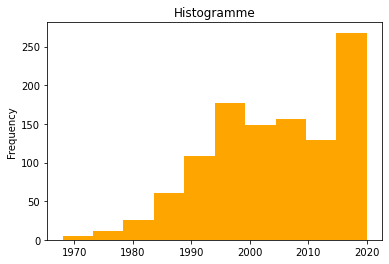

In [57]:
df["annee_premiere_publi"].plot(kind="hist",bins=10,
                                title = "Histogramme",
                                color = "orange")

<AxesSubplot:>

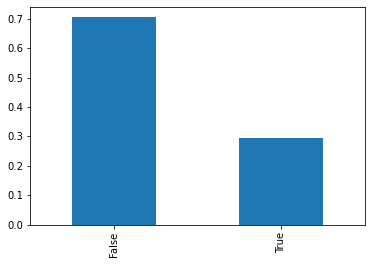

In [61]:
df["utilise_linux"].value_counts(normalize=True).plot(kind="bar")